# **Systems Simulation: Simulation and Modeling of Dynamic Systems**

```
INF301 – Systems Modeling and Simulation
Prof. Luiz Henrique Bonani
Week 02
```

# Dynamic Systems

Mathematical models of continuous systems are often defined in terms of differential equations. Although differential equations are particularly elegant and, in the real world, it would be possible to solve them explicitly, this is not generally the approach taken.

Thus, reasonable approximations using numerical methods are normally sufficient in practice. One class of continuous models is dynamic systems, characterized by their states and often described by a set of differential equations.

## Initial Value Problems

When differential equations, combined with their initial conditions, uniquely specify the system, the variables defined by the initial conditions constitute the system's state variables.

There are n initial conditions when n is the order of the system being studied. In other words, there are n first-order differential equations.

The output variables of each first-order differential equation, each with its own initial conditions, make up a set of state variables of the system.

However, since the equations are not unique, the state variables are not unique either. There are exactly n of them, and so we begin by considering first-order initial value problems.

$$ \frac{d\mathbf{x}}{dt} = f(t,\mathbf{x}) $$
$$ \mathbf{x}(t_0) = \mathbf{x}_0$$

where $\mathbf{x}(t) = [x_1(t), x_2(t), ..., x_n(t)]$ is the system state array and $\mathbf{x}(0) = [x_1(0), x_2(0), ..., x_n(0)]$ are the correspondents initial values.

# Example 1

Consider a system defined by the following differential equations:

$$ \begin{equation}
   \begin{array}{rl}
   \ddot \alpha + 2 \beta \dot \alpha + \beta^2 \alpha & = & \cos(t) \\
   \dot \beta + \alpha \beta & = & 4
   \end{array}
   \end{equation} $$  

The initial conditions are given: $\alpha(0) = 2, \dot \alpha(0) = -1, \beta(0) = 1$.

By redefining it as a system with first-order differential equations, new variables are introduced:  $x_1 = \alpha(t), x_2 = \dot \alpha(t), x_3 = \beta(t)$:

$$ \begin{equation}
   \begin{array}{rl}
   \dot x_2 + 2 x_2x_3 + x_3^2 x_1 & = & \cos(t) \\
   \dot x_3 + x_1 x_3 & = & 4
   \end{array}
   \end{equation} $$  


Noting the relationship between the variables, $x_2$ is the derivative of $x_1$, the equations can be rewritten:

$$ \begin{equation}
   \begin{array}{ll}
   \dot x_1 = x_2, & x_1(0) = 2 \\
   \dot x_2 = - 2 x_2x_3 - x_1 x_3^2 + \cos(t), &  x_2(0) = -1 \\
   \dot x_3 = - x_1 x_3 + 4, & x_3(0) = 1
   \end{array}
   \end{equation} $$  

The system can be rewritten in the form below, and this technique can be applied to a wide range of systems.

$$ \begin{equation}
   \begin{array}{l}
   \mathbf{f} = [x_2, -2x_2x_3 - x_1 x_3^2 +\cos(t), - x_1 x_3 + 4 \\
   \mathbf{x}_0 = [2, -1, 1] \\
   t_0 = 0
   \end{array}
   \end{equation} $$  




# Euler Method

We now consider only first-order initial value problems. Using the definition of the derivative:

$$\lim_{h\to 0} \frac{x(t+h)-x(t)}{h} = f(t,x) $$

For small values of $h$, $x(t+h)  \approx x(t) + h f(t,x)$.   

A new discrete variable $k$ is defined in place of continuous time $t$, such that $t  \equiv t_k = hk + t_0 $. This linear transformation can be interpreted as sampling the variable $t$:

$$ x(h(k+1) + t_0)  \approx x(hk + t_0) + hf[hk + t_0, x(hk+ t_0)] $$

By introducing a new dependent discrete variable, the expression can be written accordingly.

$$ x(k+1) = x(k) + hf[t(k), x(k)]$$

Solving the equation for $x(k)$ iteratively allows an approximation of the solution for $x(t)$. It should be noted that all variables on the right-hand side are in $k$, while the left-hand side is at $k + 1$.

These expressions are called updates of the variable $x$. This is the formalization of the Euler method, which was already introduced in the previous lecture for system modeling without using differential equations.

<center>

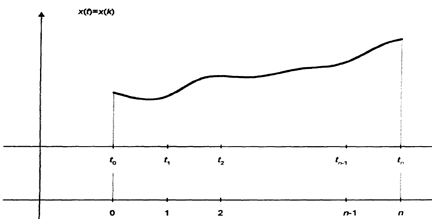
</center>

## Example 2

Consider the system described as follows.

$$ \begin{equation}
   \begin{array}{ll}
   \dot x = x^2t, & x(1) = 3
   \end{array}
   \end{equation} $$

Using differential calculus techniques, it can be shown that the exact solution to this system is:

$$ x(t) = \frac{5}{6-3t^2} $$

However, assuming that the explicit solution is unknown, the Euler method is applied. The equivalent discrete system is characterized by the given initial conditions $t_0 = 1$ and $x(t_0) = 3$, $h = 1/20$ and difference equations:

$$ \begin{equation}
   \begin{array}{ll}
   t_{k+1} & = & t_k + 1/20, \\
   x(k+1) & = & x(k) + 1/20~x^2(k)t_k
   \end{array}
   \end{equation} $$

By updating $k$ using the algorithm below, the solutions shown in the figure are obtained.

When applying the Euler Method to dynamic systems, it is important not to stray too far from the initial condition.

It is also important to keep the integration step $h$ small. The solution presented for this system reveals a singularity around $t ≈ 1.29$. Thus, the closer $t$ gets to this value, the worse the results become.

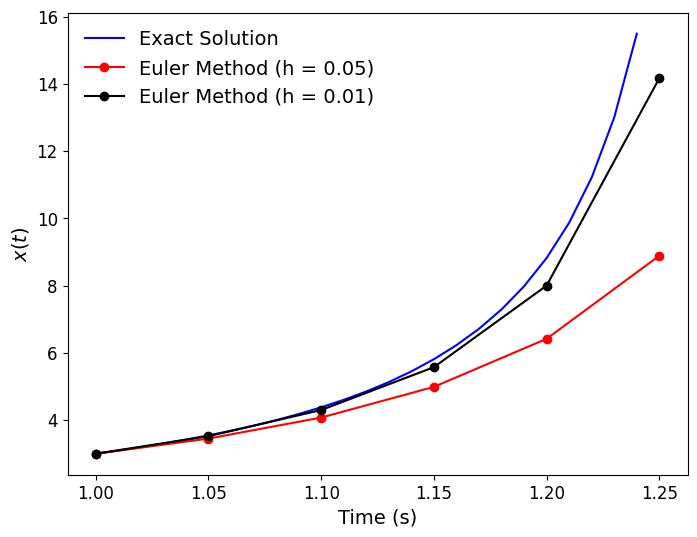

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Euler Method with h = 0.05
N1 = 6
t1 = np.zeros(N1); x1 = np.zeros(N1)
t1[0] = 1; x1[0] = 3
h1 = 0.05

for k in range(N1-1):
    x1[k+1] = x1[k] + h1 * x1[k]**2 * t1[k]
    t1[k+1] = t1[k] + h1

# Euler Method with h = 0.01
N2 = 30
t2 = np.zeros(N2); x2 = np.zeros(N2)
t2[0] = 1; x2[0] = 3
h2 = 0.01

for k in range(N2-1):
    x2[k+1] = x2[k] + h2 * x2[k]**2 * t2[k]
    t2[k+1] = t2[k] + h2

x2 = x2[::5] #downsample of x2 by 5
t2 = t2[::5] #downsample of t2 by 5

# Exact solution
T = np.arange(1,1.25,0.01)
X = 6/(5-3*T**2)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(T, X,"b-",label = "Exact Solution")
plt.plot(t1, x1,"ro-",label = "Euler Method (h = 0.05)")
plt.plot(t2, x2,"ko-",label = "Euler Method (h = 0.01)")
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()

# Taylor Method
The Taylor Method can be understood as a special case of the Taylor series expansion theorem, which relates the value in the neighborhood of the function $x(t + h)$ with its value and its higher-order attributes at time $t$:

$$ x(t+h) = \sum_{i=0}^{\infty}\frac{x^{(i)}(t)}{i!}h^i $$

In the first-order case, noting that $\dot x(t) = f(x,t)$, the equation simplifies to the Euler method update. Using a second-order approximation, this can be expressed accordingly.

$$ x(t+h) \approx x(t) + h\dot x(t) + 1/2~h^2 \ddot x(t) $$

Knowing that:

$$ \begin{equation}
   \begin{array}{lr}
   \ddot x & = & \frac{d}{dt}f(t,x)= \frac{\partial f}{\partial t} + \frac{\partial f}{\partial x} \frac{dx}{dt} \\
   & \equiv & \frac{\partial f}{\partial t} + \frac{\partial f}{\partial x} f(t,x)
   \end{array}
   \end{equation} $$  

It can be shown that the resulting update includes first and second-order derivative terms:

$$ x(t+h) \approx x(t) + hf(t,x) + 1/2~h^2 \left[\frac{\partial f}{\partial t} + \frac{\partial f}{\partial x} f(t,x)\right] $$

This equation can be discretized using difference notation.

$$ \begin{equation}
   \begin{array}{ll}
   t_{k+1} & = & t_k + h, \\
   x(k+1) & = & x(t) + hf + 1/2~h^2 \left(\frac{\partial f}{\partial t} + \frac{\partial f}{\partial x} f(x,t)\right)
   \end{array}
   \end{equation} $$  


## Example 3

Applying the Taylor Method to the previous problem, and using the known partial derivatives $\frac{\partial f}{\partial t} = x^2$ e $\frac{\partial f}{\partial x}= 2tx$, the equation simplifies as:

$$ x(k+1) = x(k) + x^2(k)t_kh+x^2(k)h^2 \left[x(k)t_k^2+1/2\right] $$

Using a step size of 0.05, the results can be seen in the figure below.

It is noted that this method is slightly more accurate than Euler’s method, but singularities still lead to intolerable approximation errors.
The algorithm to reproduce these results is also provided.

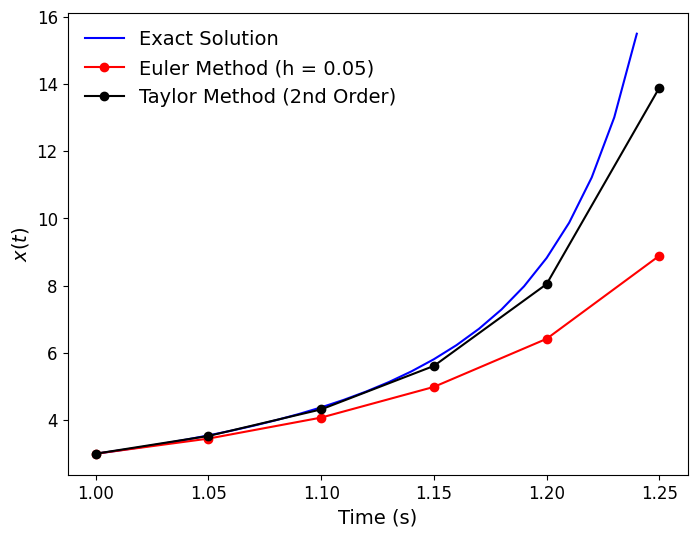

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Euler Method with h = 0.05
N1 = 6
t1 = np.zeros(N1); x1 = np.zeros(N1)
t1[0] = 1; x1[0] = 3
h1 = 0.05

for k in range(N1-1):
    x1[k+1] = x1[k] + h1 * x1[k]**2 * t1[k]
    t1[k+1] = t1[k] + h1

# Taylor Method (2nd Order)
N2 = 6
t2 = np.zeros(N2); x2 = np.zeros(N2)
t2[0] = 1; x2[0] = 3
h2 = 0.05

for k in range(N2-1):
    x2[k+1] = x2[k] + x2[k]**2*t2[k]*h2 + x2[k]**2*h2**2*(x2[k]*t2[k]**2+0.5)
    t2[k+1] = t2[k] + h2

# Exact solution
T = np.arange(1,1.25,0.01)
X = 6/(5-3*T**2)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(T, X,"b-",label = "Exact Solution")
plt.plot(t1, x1,"ro-",label = "Euler Method (h = 0.05)")
plt.plot(t2, x2,"ko-",label = "Taylor Method (2nd Order)")
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()

The comparison shows better results for the Taylor method, and if more terms are added, the results improve progressively.
In fact, a fourth-order approximation is often used in practice.

$$ x(t+h) = x(t) + h\dot x(t) + 1/2~h^2\ddot x(t) + 1/6~h^3 x^{(3)}(t) + 1/24~h^4 x^{(4)}(t)$$


# Drawback of the Taylor Method
The main drawback of the Taylor Method is that applying the formula requires taking several derivatives of the function, as shown in the second-order example.

This can be tedious and even impossible, especially when an analytical expression is not available.

Moreover, many real-world systems behave this way—only the signal values are available, not their derivatives, which must then be inferred.

# Runge-Kutta Method

An alternative to explicitly evaluating derivatives is to use the so-called Runge-Kutta algorithm.

$$ \begin{equation}
   \begin{array}{rl}
   \kappa_1 & = & f(t_k,x(k)) \\
   \kappa_2 & = & f(t_k + 1/2~h, x(k)+1/2~h \kappa_1) \\
   \kappa_3 & = & f(t_k + 1/2~h, x(k)+1/2~h \kappa_2) \\
   \kappa_4 & = & f(t_k + 1/2~h, x(k)+h \kappa_3) \\
   t_{k+1} & = & t_k + h \\
   x(k+1) & = & x(k) + 1/6~h(\kappa_1 + 2\kappa_2 + 2\kappa_3 + \kappa_4)
   \end{array}
   \end{equation} $$  

This algorithm can be shown to be equivalent to the fourth-order Taylor approximation and just as accurate.

The Runge-Kutta algorithm offers two advantages:

* It is as accurate as the fourth-order Taylor approximation.

* It is easy to use, since no derivatives need to be evaluated.

# Example 4

Applying the Runge-Kutta method to solve the dynamic system in the previous example, with a step size h = 0.05, the results are shown in the figure below.

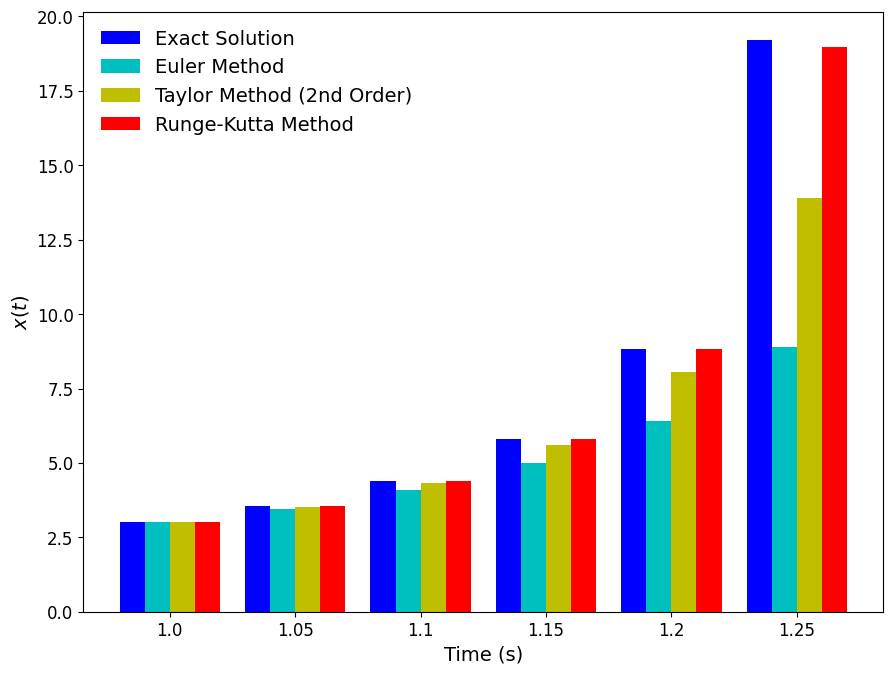

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution
t1 = np.arange(1,1.26,0.01)
x1 = 6/(5-3*t1**2)
t1 = t1[::5] #downsample of t1 by 5
x1 = x1[::5] #downsample of x1 by 5


# Euler Method (h = 0.05)
N2 = 6
t2 = np.zeros(N2); x2 = np.zeros(N2)
t2[0] = 1; x2[0] = 3
h2 = 0.05

for k in range(N2-1):
    x2[k+1] = x2[k] + h2 * x2[k]**2 * t2[k]
    t2[k+1] = t2[k] + h2


# Taylor Method (2nd Order)
N3 = 6
t3 = np.zeros(N3); x3 = np.zeros(N3)
t3[0] = 1; x3[0] = 3
h3 = 0.05

for k in range(N3-1):
    x3[k+1] = x3[k] + x3[k]**2*t3[k]*h3 + x3[k]**2*h3**2*(x3[k]*t3[k]**2+0.5)
    t3[k+1] = t3[k] + h3


# Runge-Kutta Method
N4 = 6;
t4 = np.zeros(N4); x4 = np.zeros(N4)
K1 = np.zeros(N4); K2 = np.zeros(N4); K3 = np.zeros(N4); K4 = np.zeros(N4)
t4[0] = 1; x4[0] = 3
h4 = 0.05

for k in range(N4-1):
    K1[k] = x4[k]**2 * t4[k]
    K2[k] = (t4[k] + 0.5 * h4) * (x4[k] + 0.5 * h4 * K1[k])**2
    K3[k] = (t4[k] + 0.5 * h4) * (x4[k] + 0.5 * h4 * K2[k])**2
    K4[k] = (t4[k] + h4) * (x4[k] + h4 * K3[k])**2
    x4[k+1] = x4[k] + 1/6 * h4 * (K1[k] + 2 * K2[k] + 2 * K3[k] + K4[k])
    t4[k+1] = t4[k] + h4


data = [x1,x2,x3,x4]

bw = 0.2
X = np.arange(len(t1))

# Figurea
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 3* bw/2, data[0], color = "b", width = bw, label="Exact Solution")
ax.bar(X - bw/2, data[1], color = "c", width = bw, label="Euler Method")
ax.bar(X + bw/2, data[2], color = "y", width = bw, label="Taylor Method (2nd Order)")
ax.bar(X + 3* bw/2, data[3], color = "r", width = bw, label="Runge-Kutta Method")
ax.set_xticks(X)
ax.set_xticklabels(np.around(t1, decimals=2))
ax.set_xlabel("Time (s)",fontsize=14)
ax.set_ylabel(r"$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()

# Singularities
It is evident that higher-order solution methods yield better accuracy.

However, singularities still cause significant problems. This is because the derivative tends to infinity as it approaches a critical point.

Thus, all terms of the approximation (if possible) would be needed to follow the function precisely.


<center>

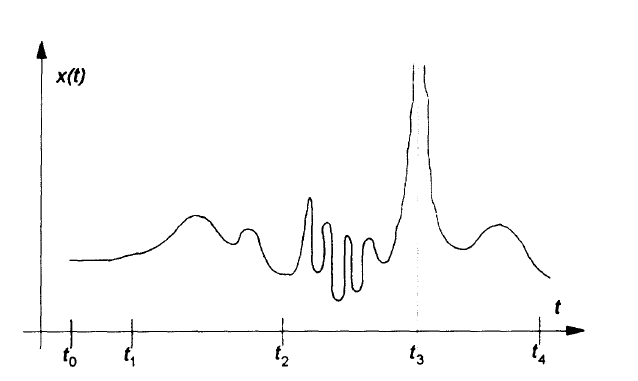
</center>

In the previous figure, different regions require different integration approaches.

In the region [t₀, t₁], a zero-order method might be enough, as the function is nearly constant.

In [t₁, t₂], a second-order method is better, since both the signal and curvature change.

In [t₂, t₃], more frequent changes occur, so a small step size and likely a high-order strategy such as Runge-Kutta is recommended.

In any case, values in [t₃, t₄] would be completely inaccurate due to the singularity at t₃. This is true regardless of the method's order.

# Unknown Solutions
The above interpretation is easy to make if the solution $x(t)$ is known—if that were the case, the problem would already be solved. It would be very useful if such insights were available for a given function $f(t)$.

Unfortunately, testing various approaches (first, second, or higher orders) for the same problem can lead to different results. However, by continuously decreasing the step size $h$, the results may eventually converge, and a "solution" can be considered satisfactory.

# Adaptive Runge-Kutta Methods

One of the most popular heuristics is to compute the solution using different orders, such as fourth- and fifth-order Runge-Kutta.
If the results are similar, the integration process relaxes the step size (typically by tripling h).
On the other hand, if the results differ significantly, the step size is reduced (typically by a factor of 10).




# Fifth-Order Runge-Kutta-Fehlberg

The 5th Order Runge-Kutta-Fehlberg Algorithm is given by the following formulas:

$$ \begin{equation}
   \begin{array}{rl}
   x(k+1) & =  & x(k) + h \left(\frac{25}{216} \kappa_1 + \frac{1408}{2565} \kappa_3 + \frac{2197}{4104} \kappa_4 - \frac{1}{5} \kappa_5 \right) \\
   y(k+1) & =  & y(k) + h \left(\frac{16}{135} \kappa_1 + \frac{6656}{12825} \kappa_3 + \frac{28561}{56430} \kappa_4 - \frac{9}{50} \kappa_5 + \frac{2}{55} \kappa_6 \right) \\
   \kappa_1 & = & f(t_k,x(k)) \\
   \kappa_2 & = & f(t_k + 1/4~h, x(k)+1/4~h \kappa_1) \\
   \kappa_3 & = & f(t_k + 3/8~h, x(k)+ h[3/32~\kappa_3 + 9/32~\kappa_2]) \\
   \kappa_4 & = & f(t_k + 12/13~h, x(k)+h[1932/2197~\kappa_1-7200/2197~\kappa_2+7296/2197~\kappa_3]) \\
   \kappa_5 & = & f(t_k + h, x(k)+h[439/216~\kappa_1-8~\kappa_2+3680/513~\kappa_3-845/4104~\kappa_4]) \\
   \kappa_6 & = & f(t_k + 1/2~h, x(k)+h[-8/27~\kappa_1+ 2~\kappa_2-3544/2565~\kappa_3+1859/4104~\kappa_4-11/50~\kappa_5])
   \end{array}
   \end{equation} $$  

The fifth-order Runge-Kutta-Fehlberg algorithm is a powerful and precise method.
However, it still becomes ineffective in the presence of singularities.



# Higher-Order Systems
It is often possible to reduce any collection of differential equations to an equivalent set of first-order equations.
Once this is done, any of the previously discussed techniques can be applied to obtain an approximate solution.

For example, a system with two first-order differential equations can be addressed in this way:

$$ \begin{equation}
   \begin{array}{rl}
   \dot x = f(t,x,y) \\
   \dot y = g(t,x,y) \\
   x(t_0) = x_0 \\
   y(t_0) = y_0
   \end{array}
   \end{equation} $$

By associating $\kappa_1$, $\kappa_2$, $\kappa_3$ and $\kappa_4$ with the variable $x$ and $\lambda_1$, $\lambda_2$, $\lambda_3$ and $\lambda_4$ with the variable $y$, one can extend the Runge-Kutta method to this problem as follows:

$$ \begin{equation}
   \begin{array}{rl}
   \kappa_1 & = & f(t_k,x(k),y(k)) \\
   \lambda_1 & = & g(t_k,x(k),y(k)) \\
   \kappa_2 & = & f(t_k + 1/2~h, x(k)+1/2~h \kappa_1, y(k) + 1/2~h\lambda_1) \\
   \lambda_2 & = & g(t_k + 1/2~h, x(k)+1/2~h \kappa_1, y(k) + 1/2~h\lambda_1) \\
   \kappa_3 & = & f(t_k + 1/2~h, x(k)+1/2~h \kappa_2, y(k) + 1/2~h\lambda_2) \\
   \lambda_3 & = & g(t_k + 1/2~h, x(k)+1/2~h \kappa_2, y(k) + 1/2~h\lambda_2) \\
   \kappa_4 & = & f(t_k + 1/2~h, x(k)+h \kappa_3, y(k)+h \lambda_3) \\
   \lambda_4 & = & g(t_k + 1/2~h, x(k)+h \kappa_3, y(k)+h \lambda_3) \\
     x(k+1) & = & x(k) + 1/6~h(\kappa_1 + 2\kappa_2 + 2\kappa_3 + \kappa_4) \\
   y(k+1) & = & y(k) + 1/6~h(\lambda_1 + 2\lambda_2 + 2\lambda_3 + \lambda_4)
   \end{array}
   \end{equation} $$  

## Example 5

Considering the system described by the block diagram below, the goal is to obtain the solution $x(t)$.

<center>

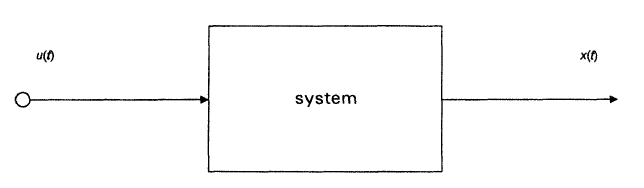

</center>



$$ \ddot x + 3\dot x x = u(t) $$
$$ u(t) = t, t \geq 0 $$
$$ x(0) = 2 $$
$$ \dot x(0) = 1 $$

An equivalent definition of the system can be constructed:

$$ \dot x = y $$
$$ \dot y = t - 3xy $$
$$ x(0) = 2 $$
$$ y(0) = 1 $$

The system can be discretized using the Euler method:

$$ \begin{equation}
   \begin{array}{rl}
  t_{k+1} & = & t_k+h \\
    x(k+1) & = & x(k) + h y(k) \\
   y(k+1) & = & y(k) + h[t_k - 3x(k)y(k)]
   \end{array}
   \end{equation} $$  

The system can also be solved using the Runge-Kutta method:

$$ \begin{equation}
   \begin{array}{rl}
   \kappa_1 & = & y(k) \\
   \lambda_1 & = & t_k - 3x(k)y(k) \\
   \kappa_2 & = & y(k) + 1/2~h\lambda_1 \\
   \lambda_2 & = & t_k + 1/2 h - 3[x(k)+1/2~h\kappa_1][y(k)+1/2~h\lambda_1] \\
  \kappa_3 & = & y(k) + 1/2~h\lambda_2 \\
   \lambda_3 & = & t_k + 1/2 h - 3[x(k)+1/2~h\kappa_2][y(k)+1/2~h\lambda_2] \\
   \kappa_4 & = & y(k) + h~\lambda_3 \\
   \lambda_4 & = & t_k + h-3[x(k)+h~\kappa_3][y(k)+h\lambda_3] \\
   x(k+1) & = & x(k) + 1/6~h(\kappa_1 + 2\kappa_2 + 2\kappa_3 + \kappa_4) \\
   y(k+1) & = & y(k) + 1/6~h(\lambda_1 + 2\lambda_2 + 2\lambda_3 + \lambda_4)
   \end{array}
   \end{equation} $$  

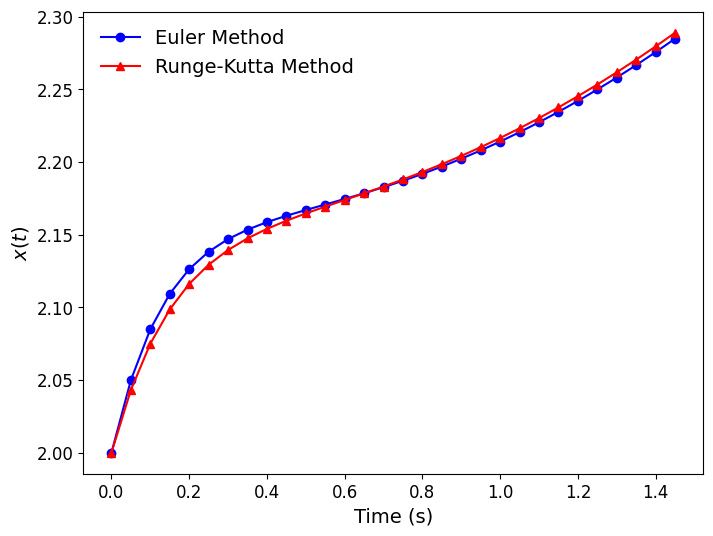

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 30

# Euler method (h = 0.05)
t1 = np.zeros(N); x1 = np.zeros(N); y1 = np.zeros(N)
t1[0] = 0; x1[0] = 2; y1[0] = 1
h1 = 0.05

for k in range(N-1):
    #xa = x1[k] + h1 * y1[k];
    #ya = y1[k] + h1 * (t1[k] - 3 * x1[k] * y1[k])
    x1[k+1] = x1[k] + h1 * y1[k];
    y1[k+1] = y1[k] + h1 * (t1[k] - 3 * x1[k] * y1[k])
    t1[k+1] = t1[k] + h1;

# Runge-Kutta  method
t2 = np.zeros(N); x2 = np.zeros(N); y2 = np.zeros(N)
K1 = np.zeros(N); K2 = np.zeros(N); K3 = np.zeros(N); K4 = np.zeros(N)
L1 = np.zeros(N); L2 = np.zeros(N); L3 = np.zeros(N); L4 = np.zeros(N)
t2[0] = 0; x2[0] = 2; y2[0] = 1
h2 = 0.05

for k in range(N-1):
    # Coeficients
    K1[k] = y2[k]
    L1[k] = t2[k] - 3 * x2[k] * y2[k]
    K2[k] = y2[k] + 0.5* h2 * L1[k]
    L2[k] = t2[k] + 0.5* h2 - 3 * (x2[k] + 0.5 * h2 * K1[k]) * (y2[k] + 0.5 * h2 * L1[k])
    K3[k] = y2[k] + 0.5* h2 * L2[k]
    L3[k] = t2[k] + 0.5* h2 - 3 * (x2[k] + 0.5 * h2 * K2[k]) * (y2[k] + 0.5 * h2 * L2[k])
    K4[k] = y2[k] + h2 * L3[k]
    L4[k] = t2[k] + h2 - 3 * (x2[k] + h2 * K3[k]) * (y2[k] + h2 * L3[k])
    # Variables' update
    x2[k+1] = x2[k] + 1/6 * h2 * (K1[k] + 2 * K2[k] + 2 * K3[k] + K4[k]);
    y2[k+1] = y2[k] + 1/6 * h2 * (L1[k] + 2 * L2[k] + 2 * L3[k] + L4[k]);
    t2[k+1] = t2[k] + h2;

# Figure
plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t1, x1,"bo-",label = "Euler Method")
plt.plot(t2, x2,"r^-",label = "Runge-Kutta Method")
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()


# Autonomous Dynamic Systems

Systems can be driven by both endogenous (internal) and exogenous (external) inputs. These inputs can be synchronous, if the system is driven by time, or asynchronous, if the system is driven by events.

It is also possible for a system to have no inputs at all, in which case it is called an autonomous system, as it is completely self-contained and its behavior is independent of external influences.

An example is the prey-predator system, which can be described by the Lotka-Volterra equations, in which $\alpha_1$, $\alpha_2$, $\beta_1$, $\beta_2$ represent the proportionality constants for each population's capacity:

$$ \dot x = \alpha_1x\left(1- \frac{y}{\beta_1} \right)$$
$$ \dot y = \alpha_2y\left(-1+ \frac{x}{\beta_2} \right)$$


## Example 6

The goal is to numerically solve the Lotka-Volterra system over the interval
[0,5].

$$ \dot x = 3x\left(1- \frac{y}{10} \right)$$
$$ \dot y = 1.2y\left(-1+ \frac{x}{25} \right)$$
$$ x(0) = 10 $$
$$ y(0) = 5 $$

Using the script below, we obtain the population values of
x and y using the Runge-Kutta method (since the analytical solution is unknown) with a step size of h=0.0001.

It should be noted that the result was achieved thanks to a sufficiently small
h, confirmed by visual convergence testing.

The phase plot shown below illustrates the balance between the two populations over time.

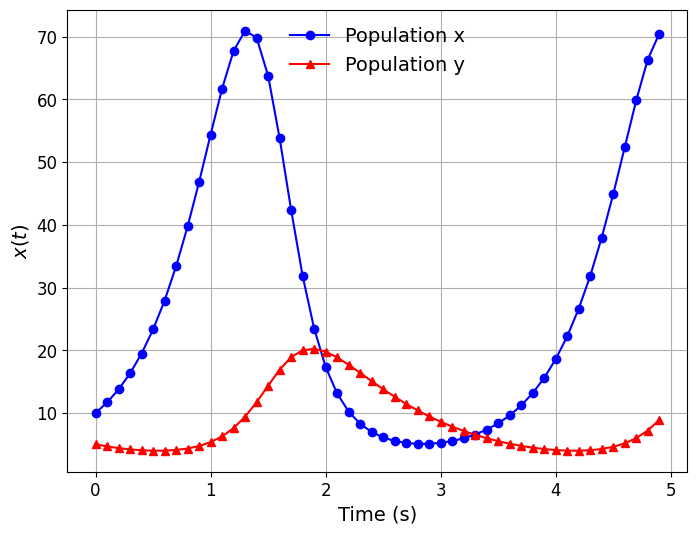

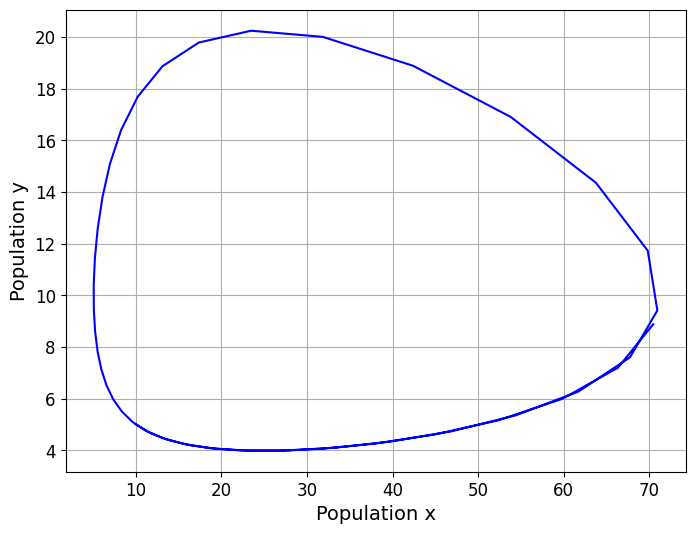

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50000;

# Runge-Kutta method
t = np.zeros(N); x = np.zeros(N); y = np.zeros(N)
Kx1 = np.zeros(N); Kx2 =np.zeros(N); Kx3 = np.zeros(N); Kx4 = np.zeros(N)
Ky1 = np.zeros(N); Ky2 = np.zeros(N); Ky3 = np.zeros(N); Ky4 = np.zeros(N)
t[0] = 0; x[0] = 10; y[0] = 5
h = 0.0001


for k in range(N-1):
    Kx1[k] = 3 * x[k] * (1-1/10 * y[k]);
    Ky1[k] = 1.2 * y[k] * (-1 + 1/25 * x[k]);

    Kx2[k] = 3 * (x[k] + h * Kx1[k]) * (1 - (y[k] + 0.5 * h * Ky1[k])/10);
    Ky2[k] = 1.2 * (y[k]+ h * Ky1[k]) * (-1 + (x[k] + 0.5 * h * Kx1[k])/25);

    Kx3[k] = 3 * (x[k] + h * Kx2[k]) * (1 - (y[k] + 0.5 * h * Ky2[k])/10);
    Ky3[k] = 1.2 * (y[k] + h * Ky2[k]) * (-1 + (x[k] + 0.5 * h * Kx2[k])/25);

    Kx4[k] = 3 * (x[k] + h * Kx3[k]) * (1 - (y[k]+ h * Ky3[k])/10);
    Ky4[k] = 1.2 * (y[k] + h * Ky3[k]) * (-1 + (x[k] + h * Kx3[k])/25);

    x[k+1] = x[k] + 1/6 * h * (Kx1[k] + 2 * Kx2[k] + 2 * Kx3[k] + Kx4[k]);
    y[k+1] = y[k] + 1/6 * h * (Ky1[k] + 2 * Ky2[k] + 2 * Ky3[k] + Ky4[k]);
    t[k+1] = t[k] + h;


x = x[::1000] #downsample of x by 1000
y = y[::1000] #downsample of y by 1000
t = t[::1000] #downsample of t by 1000

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, x,"bo-",label = "Population x")
plt.plot(t, y,"r^-",label = "Population y")
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel(r"$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.grid()
plt.show()


# Figura
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(x, y,"b-");
plt.xlabel("Population x",fontsize=14);
plt.ylabel("Population y",fontsize=14);
plt.grid()
plt.show()


# Exercises


1. Show that the solution to the logistic equation   $\frac{dx}{dt}=\lambda~x\left(1-\frac{x}{x_m}\right)$, with $x(0) = x_0$ is given by:

$$ x(t) = \frac{x_m}{1-(1-x_m/x_0)\exp(-\lambda t)} $$

2. Consider the Lotka-Volterra system described by the equations below. Create a suitable simulation and interpret the graphical results over the interval  [0, 25].

$$ \dot x = 3x\left(1- \frac{y}{10} + \frac{z}{15} \right),~~~~x(0) = 5$$
$$ \dot y = 1.2y\left(-1+ \frac{x}{20} - \frac{z}{25} \right),~~~~y(0) = 10$$
$$ \dot z = 2z\left(1 - \frac{x}{30} - \frac{y}{35} \right),~~~~z(0) = 8$$

# References

1. SEVERANCE, F. L., System Modeling and Simulation, John Wiley & Sons, 2001. (Some figures shown in this lecture were taken from this reference).